In [164]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-aug-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-aug-2022/train.csv
/kaggle/input/tabular-playground-series-aug-2022/test.csv


## Installing tensorflow Decision tree forest library
We need to explicitly install this library since it's not supported on kaggle yet

In [165]:

pip install tensorflow_decision_forests

Note: you may need to restart the kernel to use updated packages.


## Importing the necessary libraries
We need to explicitly install this library since it's not supported on kaggle yet

In [166]:
import tensorflow_decision_forests as tfdf
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
try:
  from wurlitzer import sys_pipes
except:
  from colabtools.googlelog import CaptureLog as sys_pipes

from IPython.core.magic import register_line_magic
from IPython.display import Javascript

In [167]:
data = pd.read_csv('/kaggle/input/tabular-playground-series-aug-2022/train.csv', index_col = 'id')
data.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,,,,,,,,,,,,,,,,,,,,,
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


The dataset contains 24 features and the column `failure` is the label column. Let's quickly do a basic exploration before diving deep into the dataset.

In [168]:
data.describe()

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
count,26320.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26189.000000,26032.000000,25894.000000,25774.000000,...,25343.000000,25270.000000,25102.000000,24969.000000,24796.000000,24696.000000,24561.000000,24460.000000,24286.000000,26570.000000
mean,127.826233,6.754046,7.240459,7.415883,8.232518,6.256568,17.791528,11.731988,17.127804,17.510759,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0.212608
std,39.030020,1.471852,1.456493,4.116690,4.199401,3.309109,1.001200,0.996085,0.996414,0.995980,...,0.999137,1.405978,1.520785,1.488838,1.155247,1.491923,1.549226,1.708935,123.304161,0.409160
min,33.160000,5.000000,5.000000,0.000000,0.000000,0.000000,13.968000,8.008000,12.073000,12.715000,...,7.537000,9.323000,12.461000,5.167000,10.890000,9.140000,9.104000,9.701000,196.787000,0.000000
25%,99.987500,6.000000,6.000000,4.000000,5.000000,4.000000,17.117000,11.051000,16.443000,16.839000,...,10.757000,15.209000,18.170000,10.703000,14.890000,15.057000,13.957000,15.268000,618.961500,0.000000
50%,122.390000,6.000000,8.000000,7.000000,8.000000,6.000000,17.787000,11.733000,17.132000,17.516000,...,11.430000,16.127000,19.211500,11.717000,15.628500,16.040000,14.969000,16.436000,701.024500,0.000000
75%,149.152500,8.000000,8.000000,10.000000,11.000000,8.000000,18.469000,12.410000,17.805000,18.178000,...,12.102000,17.025000,20.207000,12.709000,16.374000,17.082000,16.018000,17.628000,784.090250,0.000000
max,385.860000,9.000000,9.000000,29.000000,29.000000,24.000000,21.499000,16.484000,21.425000,21.543000,...,15.412000,22.479000,25.640000,17.663000,22.713000,22.303000,21.626000,24.094000,1312.794000,1.000000


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26570 entries, 0 to 26569
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_code    26570 non-null  object 
 1   loading         26320 non-null  float64
 2   attribute_0     26570 non-null  object 
 3   attribute_1     26570 non-null  object 
 4   attribute_2     26570 non-null  int64  
 5   attribute_3     26570 non-null  int64  
 6   measurement_0   26570 non-null  int64  
 7   measurement_1   26570 non-null  int64  
 8   measurement_2   26570 non-null  int64  
 9   measurement_3   26189 non-null  float64
 10  measurement_4   26032 non-null  float64
 11  measurement_5   25894 non-null  float64
 12  measurement_6   25774 non-null  float64
 13  measurement_7   25633 non-null  float64
 14  measurement_8   25522 non-null  float64
 15  measurement_9   25343 non-null  float64
 16  measurement_10  25270 non-null  float64
 17  measurement_11  25102 non-null 

### Checking how many missing values are there 

In [170]:
data.isnull().sum().sort_values(ascending=False)

measurement_17    2284
measurement_16    2110
measurement_15    2009
measurement_14    1874
measurement_13    1774
measurement_12    1601
measurement_11    1468
measurement_10    1300
measurement_9     1227
measurement_8     1048
measurement_7      937
measurement_6      796
measurement_5      676
measurement_4      538
measurement_3      381
loading            250
product_code         0
measurement_2        0
measurement_1        0
measurement_0        0
attribute_3          0
attribute_2          0
attribute_1          0
attribute_0          0
failure              0
dtype: int64

[]

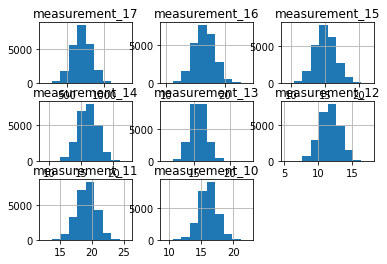

In [171]:
df[['measurement_17', 'measurement_16', 'measurement_15', 'measurement_14', 'measurement_13', 'measurement_12', 'measurement_11', 'measurement_10']].hist()
plt.plot()

[]

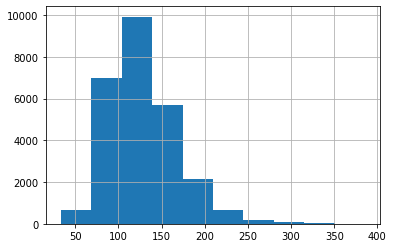

In [172]:
df['loading'].hist()
plt.plot()

[]

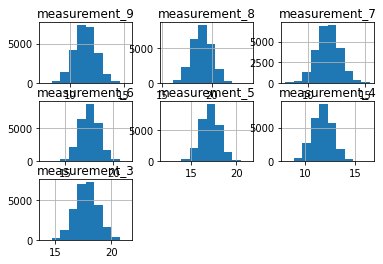

In [173]:
df[['measurement_9', 'measurement_8', 'measurement_7', 'measurement_6', 'measurement_5', 'measurement_4', 'measurement_3']].hist()
plt.plot()

## Pre-processing 

Tf Decision Trees will work with both categorical and numerical data and account for any missing data as well. 

In [174]:
df[['measurement_17', 'measurement_16', 'measurement_15', 'measurement_14', 'measurement_13', 'measurement_12', 'measurement_11', 'measurement_10', 'measurement_9', 'measurement_8', 'measurement_7', 'measurement_6', 'measurement_5', 'measurement_4', 'measurement_3']].fillna('mean', axis=0, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [175]:
df[['loading']].fillna('mode', axis=0, inplace=True)

## Training and evaluation
We will split the dataset into train and test set with a 90%-10% split percentage. I just like keeping most of the data for training purposes. You will also notice that we ditched scikit-learn and used nuumpy and pandas to do the splitting by utilizing randomness from the numpy module. Although there remains a question for reproducability since there are no random_seed param here unlike that in Scikit-learn. This something to explore in future as well

In [176]:
# Split the dataset into a training and a testing dataset.

def split_dataset(dataset, test_ratio=0.10):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds_pd, test_ds_pd = split_dataset(data)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

23990 examples in training, 2580 examples for testing.


## Tf Datasets

We convert the pandas dataframes to tensorflow datasets which are more efficient and provide faster operations. Check out them [here](https://www.tensorflow.org/api_docs/python/tf/data/Dataset)

In [177]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label="failure")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label="failure")

/opt/conda/lib/python3.7/site-packages/tensorflow_decision_forests/keras/core.py:2574: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_dataframe = dataframe.drop(label, 1)


## Training and model selection

#### Tf-df provides a few variants learning algorithms for Decision trees namely:
- RandomForest
- GradientBoosted Trees
- CartModel,
- DistributedGradientBoostedTreesModel

##### For this notebook I tried the first two and found the second to perform better

In [178]:
# Specify the model.
model_1 = tfdf.keras.GradientBoostedTreesModel(
    num_trees=17,
    growing_strategy="BEST_FIRST_GLOBAL",
    max_depth=8,
    split_axis="SPARSE_OBLIQUE",
    categorical_algorithm="RANDOM",)

# Optionally, add evaluation metrics.
model_1.compile(
    metrics=[tf.keras.metrics.AUC()])

# Train the model.

model_1.fit(x=train_ds)

Use /tmp/tmp5i8bqhf8 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.824127. Found 23990 examples.
Training model...
Model trained in 0:00:27.658675
Compiling model...


[INFO kernel.cc:1176] Loading model from path /tmp/tmp5i8bqhf8/model/ with prefix c831646f347e4340
[INFO abstract_model.cc:1248] Engine "GradientBoostedTreesGeneric" built
[INFO kernel.cc:1022] Use fast generic engine


Model compiled.


## Evaluation
When the model finishes training you can evaluate it on the test dataset that we set aside earlier. Based on the performance here we can then decide to tune hyperparameters or change the learning algorithm to suit our needs

In [179]:
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

3/3 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - auc_6: 0.5697

loss: 0.0000
auc_6: 0.5697


## Inspecting model structures and hidden score
The different algorithms of Decision Trees will score the features differently and assign importance, we can inspect them like so

In [180]:
#model_1.summary()

In [181]:
#model_1.make_inspector().features()

In [182]:
#model_1.make_inspector().variable_importances()

## Inspecting and Plotting the training logs 📈📉
The training logs which are availbale through the `make_inspector()` method contain wealth of information of how the training progresses. It is more useful to plot the result and inpect the trend

In [183]:
#model_1.make_inspector().training_logs()

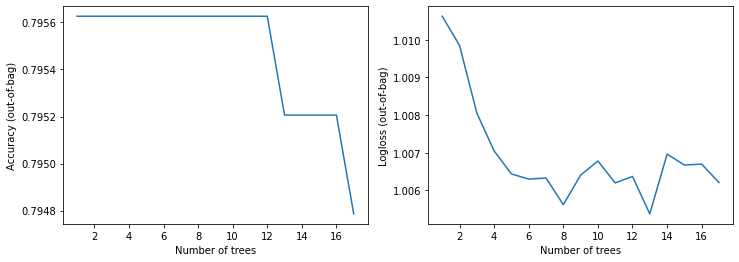

In [184]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

We can see that training process fluctuates quite a lot but the model converges after 25 or so number of trees

## Submission Time

In [185]:
updated_test = pd.read_csv('/kaggle/input/tabular-playground-series-aug-2022/test.csv', index_col = 'id')

test = tfdf.keras.pd_dataframe_to_tf_dataset(updated_test)
preds = model_1.predict(test)

21/21 [==============================] - 0s 14ms/step


In [186]:
submission = pd.read_csv('/kaggle/input/tabular-playground-series-aug-2022/sample_submission.csv')
submission['failure'] = preds

Finally we shouldn't forget that the model is returning a probability between 0 and 1 and we need to define a threshold above which the prediction is true and false otherwise

In [187]:
def transformTo_bool(x):
    if x < 0.5:
        return 0
    else:
        return 1

submission['failure'] = submission['failure'].apply(transformTo_bool)


In [188]:
submission.to_csv('submission.csv', header=True, index=False)

## References:
* [Official Tensorflow Decision Forest Blog](https://blog.tensorflow.org/2021/05/introducing-tensorflow-decision-forests.html)
* [Official Tensorflow Page for Decision Forest](https://www.tensorflow.org/decision_forests)


In [189]:
#submission.head()